In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy, binom, bernoulli
from functools import partial
entropy=partial(entropy, base=2)
np.random.seed = 42

Latex macros
$\renewcommand{\vec}[1]{\mathbf{#1}}$
$\renewcommand{\ex}[1]{\mathbb{E}\left[{#1}\right]}$
$\renewcommand{\dkl}[2]{D_\text{KL}\left(\mathbf{#1\|#2}\right)}$
$\renewcommand{\hyp}{\mathcal{H}}$
$\renewcommand{\soin}{s_\text{in}}$
$\renewcommand{\sout}{s_\text{out}}$

# Noisy-Channel Coding

## Dependent Random Variables

Preliminary mathematics needed for the upcoming topics. Entropies and information and it's all conditional and stuff.

### Definition time:  
**Joint entropy** 
$$H(X,Y)=\sum_{xy\in A_X A_Y}P(x,y)\log\frac1{P(x,y)}$$  
**Conditional entropy of $X$ given $y=b_k$** 
$$H(X\mid y=b_k)=\sum_{x\in A_X}P(x\mid y=b_k)\log\frac1{P(x\mid y=b_k)}$$
**Conditional entropy of $X$ given $Y$**
$$\begin{align}
H(X\mid Y) &= \sum_{y\in\mathcal{A}_Y}P(y)\left[\sum_{x\in\mathcal{A}_X}P(x\mid y)\log\frac1{P(x\mid y)}\right] \\
&= \sum_{xy\in\mathcal{A}_X\mathcal{A}_Y}P(x,y)\log\frac1{P(x\mid y)}
\end{align}$$
**Chain rule for information content**
$$h(x,y)=h(x)+h(y\mid x)$$
**Chain rule for entropy**
$$H(X,Y)=H(X)+H(Y\mid X)$$
**Mutual information**
$$I(X;Y)=H(X)-H(X\mid Y)$$
**Conditional mutual information**
$$I(X;Y\mid z=c_k)=H(X\mid z=c_k)-H(X\mid Y,z=c_k)$$
$$I(X;Y\mid Z)=H(X\mid Z)-H(X\mid Y,Z)$$



### Exercises
**Exercise 8.1** $u,v,w$ independent with entropies $H_u,H_v,H_w$, $X=(U,V)$, $Y=(V,W)$.
Joint entropy
$$\begin{align}
H(X,Y) &= \sum_{x\in X,y\in Y}p(x,y)\log\frac1{p(x,y)} \\
&= \sum_{u,v\in X, v',w\in Y}p(u,v,v',w)\log\frac1{p(u,v,v',w} &\text{if $v\neq v'$ $p=0$} \\
&=\sum_{u,v,w}p(u)p(v)p(w)\left(\log\frac1{p(u)}+\log\frac1{p(v)}+\log\frac1{p(w)}\right) \\
&=\sum_up(y)\sum_vp(v)\sum_wp(w)\left(\log\frac1{p(u)}+\log\frac1{p(v)}+\log\frac1{p(w)}\right) \\
&=\sum_up(y)\sum_vp(v)\left(\log\frac1{p(u)}+\log\frac1{p(v)}+H_w\right) \\
&=\sum_up(y)\left(\log\frac1{p(u)}+H_v+H_w\right) \\
&=H_u+H_v+H_w
\end{align}$$

Conditional entropy  
$$\begin{align}
H(X\mid Y) &= \sum_yp(y)\sum_xp(x\mid y)\log\frac1{p(x\mid y)} \\
&= \sum_{xy}p(x,y)\log\frac1{p(x\mid y)} \\
&= \sum_{uvw}p(u,v,w)\log\frac1{p(u,v\mid v,w)} & {\scriptstyle p(u,v\mid v,w)=\frac{p(u,v,w)}{p(v,w)}=\frac{p(u)p(v)p(w)}{p(v)p(w)}}\\
&= \sum_{uvw}p(u,v,w)\log\frac1{p(u)} \\
&= H_u
\end{align}$$
Mutual information  
$$I(X;Y)=H(X)-H(X\mid Y)=(H_u+H_v)-H_u=H_v$$
So it all makes sense.

**Exercise 8.2** Find an example for $H(X)<H(X\mid y=b_k)$, but show that $H(X\mid Y)\leq H(X)$.  

|      | $$x=0$$ | $$x=1$$ | $$p(y)$$   |
| ---- |:-----:|:-----:|:-----:|
|$y=0$|0.25|0.25| 0.5 |
|$y=1$|0.4|0.1| 0.5|
|$p(x)$|0.65|0.35| |


In [19]:
H_X = .65*np.log2(1/.65) + .35*np.log2(1/.35)
H_XCY0 = 0.5*np.log2(2) + .5*np.log2(2)
H_XCY1 = .8*np.log2(1/.8) + .2*np.log2(1/.2)
f"H(X)={H_X:.3f}, H(X|y=0)={H_XCY}, H(X|Y)={0.5*H_XCY0+0.5*H_XCY1:.3f}"

'H(X)=0.934, H(X|y=0)=1.0, H(X|Y)=0.861'

$$H(X)-H(X\mid Y)=\sum_{xy}p(x,y)\log\frac{p(x\mid y)}{p(x)}
=\sum_{xy}p(x,y)\log\frac{p(x,y)}{p(x)p(y)}$$

Let's mark $q(x,y)=p(x)p(y)$ (it's a distribution), then we get
$$\sum_{xy}p(x,y)\log\frac{p(x,y)}{p(x)p(y)}=\dkl{P}{Q}\geq0$$
from Gibbs' inequality.

**Exercise 8.3** Prove the chain rule for entropy.  
$$\begin{align}
H(X)+H(Y|X)&=\sum_{x}p(x)\log\frac1{p(x)}+\sum_{xy}p(x,y)\log\frac1{p(y\mid x)} \\
&=\sum_{xy}p(x,y)\log\frac1{p(x)p(y\mid x)}\\
&=\sum_{xy}p(x,y)\log\frac1{p(x,y)}=H(X,Y)
\end{align}$$

**Exercise 8.4** Prove $I(X;Y)=I(Y;X)\geq0$  
$$\begin{align}
I(X;Y)&=I(Y;X) \\
H(X)-H(X\mid Y) &= H(Y)-H(Y\mid X)\\
H(X)+H(Y\mid X) &= H(Y)+H(X\mid Y)\\
H(X,Y) &= H(X,Y)
\end{align}$$
Regarding $I(X;Y)\geq0$, we showed in **8.2** that $H(X)-H(X\mid Y)\geq0$ but by definition $H(X)-H(X\mid Y)=I(X;Y)$.

**Exercise 8.5** Prove $D_H(X,Y)=H(X,Y)-I(X;Y)$ is a metric.  
- $D_H(X,Y)\geq0$: $H(X,Y)-I(X;Y)=H(X)+H(Y\mid X)-\left(H(X)-H(X\mid Y)\right)=H(Y\mid X)+H(X\mid Y)\geq0$.
- $D_H(X,X)=0$: $H(X,X)-I(X;X)=H(X)-\left(H(X)-H(X\mid X)\right)=H(X)-H(X)+0=0$.
- $D_H(X,Y)=D_H(Y,X)$: $H(X,Y)-I(X;Y)=H(Y,X)-I(Y;X)$.
- $D_H(X,Z)\leq D_H(X,Y)+D_H(Y,Z)$: $D_H(X,Y)=P(X\mid Y)+P(Y\mid X)$. So we'll see $P(X\mid Z)\leq P(X\mid Y)+P(Y\mid Z)$ and $P(Z\mid X)\leq P(Y\mid X)+P(Z\mid Y)$.
$$\begin{align}
P(X\mid Z)&\leq P(X\mid Y)+P(Y\mid Z) \\
\sum_{xz}p(x,z)\log\frac1{p(x\mid z)}&\leq\sum_{xy}p(x,y)\log\frac1{p(x\mid y)}+\sum_{yz}p(y,z)\log\frac1{p(y\mid z)} \\
\sum_{xyz}p(x,y,z)\log\frac1{p(x\mid z)}&\leq\sum_{xyz}p(x,y,z)\log\frac1{p(x\mid y)}+\sum_{xyz}p(x,y,z)\log\frac1{p(y\mid z)} \\
0&\leq\sum_{xyz}p(x,y,z)\log\frac1{p(x\mid y)}+p(x,y,z)\log\frac1{p(y\mid z)}-p(x,y,z)\log\frac1{p(x\mid z)}\\
0&\leq\sum_{xyz}p(x,y,z)\left[\log\frac1{p(x\mid y)}+\log\frac1{p(y\mid z)}-\log\frac1{p(x\mid z)}\right]\\
0&\leq\sum_{xyz}p(x,y,z)\log\frac{p(x\mid z)}{p(x\mid y)p(y\mid z)}\\
0&\leq\sum_{xyz}p(x,y,z)\log\frac{p(x, z)}{p(x\mid y)p(y,z)}\\
\end{align}$$
We will use Gibbs. First, $q(x,y,z)=p(x\mid y)p(y,z)$ is a distribution as it sums to 1 and it is non-negative. Secondly,
$$\sum_{xyz}p(x,y,z)\log\frac{p(x, z)}{p(x\mid y)p(y,z)}\geq\sum_{xyz}p(x,y,z)\log\frac{p(x,y,z)}{p(x\mid y)p(y,z)}$$
since log is monotonic-increasing, and now from Gibbs
$$\sum_{xyz}p(x,y,z)\log\frac{p(x,y,z)}{p(x\mid y)p(y,z)}\geq 0$$
so the original inequality is true. The proof for the $P(Z\mid X)\leq P(Y\mid X)+P(Z\mid Y)$ is symmetric.  

_I first tried to prove triangle inequality from definitions and algebraic manipulation, but I got into ciruclarity. Then I remembered that to prove $H(X\mid Y)\leq H(X)$ I used Gibbs, so even though the intuition divides the information nicely into parts $H(X\mid Y)+I(X;Y)$, you can't use the definition to prove it._

**Exercise 8.7** XYZ ensemble, all with alphabet $\{0,1\}$, $x$ and $y$ independent, $\mathcal P_X=\{p,1-p\}$, $\mathcal P_Y=\{q,1-q\}$ and
$$z=(x+y)\mod 2$$
1. if $q=\frac12$ the $\mathcal P_Z$ is unbiased coin, and $I(Z;X)=0$.
2. $p(z=0)=p(x=0, y=0)+p(x=1,y=1)=pq+(1-p)(1-q)=1-p-q+2pq$  
   $p(z=1)=p+q-2pq$. $I(Z;X)=H(Z)-H(Z\mid X)$  
   $H(Z)=(2pq-p-q+1)\log\frac1{2pq-p-q+1}+(p+q-2pq)\log\frac1{p+q-2pq}$  
   $H(Z\mid X)=pq\log\frac1q+(1-p)(1-q)\log\frac1{1-q}+p(1-q)\log\frac1{1-q}+(1-p)q\log\frac1q=q\log\frac1q+(1-q)\log\frac1{1-q}$

## Communication over a Noisy Channel
We will now explore the fundamental possibilities and limitations of error-free communication through a noisy channel. The aim of channel coding is to make the noisy channel behave like a noiseless channel.

**A discrete memory less channel** $Q$ is a triplet $\left\{\mathcal{A}_X, \mathcal{A}_Y,\{P(y\mid x)\colon x\in\mathcal{A}_X\}\right\}$.  
The transition probabilities may be written in a matrix
$$Q_{j\mid i}=P(y=b_j\mid x=a_i)$$
The matrix is oriented such that each column is a probability vector.

Example channels: Binary symmetric, Binary erasure, Noisy typewriter, Z channel.

If we assume a probability distribution on the input, we can use Bayes' theorem to infer the posterior
$$P(x\mid y)=\frac{P(y\mid x)p(x)}{P(y)}$$

**Exercise 9.2** Binary symmetric channel with probability of error $f=0.15$. $\mathcal{P}_X\colon\{p_0=0.9,p_1=0.1\}$. We observe $y=0$, what is $P(x=1\mid y=0)$?
$$\begin{align}
P(x=1\mid y=0)&=\frac{p(y=0\mid x=1)p(x=1)}{\sum_{x'}p(y=0\mid x')p(x')}\\
&=\frac{0.15\times0.1}{0.15\times0.1+0.85\times0.9}\\
&=\frac{1}{52}
\end{align}$$

In [44]:
from fractions import Fraction as frac
f=frac('0.15')
q=[[1-f,f]
  ,[f,1-f]]
p_x=[frac('0.9'),frac('0.1')]
q[0][1]*p_x[1]/(q[0][0]*p_x[0]+q[0][1]*p_x[1])

Fraction(1, 52)

**Exercise 9.4** Z channel with $f=0.15$ and $\mathcal{P}_X\colon\{p_0=0.9,p_1=0.1\}$. Assume we observe $y=0$, what is $P(x=1\mid y=0)$?
$$\begin{align}
P(x=1\mid y=0)&=\frac{p(y=0\mid x=1)p(x=1)}{\sum_{x'}p(y=0\mid x')p(x')}\\
&=\frac{1}{61}
\end{align}$$

In [41]:
f=frac('0.15')
q=[[1,f]
  ,[0,1-f]]
p_x=[frac('0.9'),frac('0.1')]
q[0][1]*p_x[1]/(q[0][0]*p_x[0]+q[0][1]*p_x[1])

Fraction(1, 61)

### Information conveyed by a channel
Operationaly, we want to find ways to use the channel such that all the bits communicated are recovered with negligible probability of error. Mathematically, we use mutual information to measure how much information the output conveys about the input. How are the two connected?

**Exercise 9.7** Compute $I(X;Y)$ for binary symmetric channel with $f=0.15$, $\mathcal P_X=\left\{p_0=0.5,p_1=0.5\right\}$.
$$I(X;Y)=H(Y)-H(Y\mid X)$$
$$\mathcal{P}_Y=\{0.5,0.5\}\Rightarrow H(Y)=1$$
$$H(Y\mid X)=h_2(0.15)=0.61$$
$$H(Y)-H(Y\mid X)=1-0.61=0.39$$

In [100]:
f=0.15
q=np.array([[1-f,f]
           ,[f,1-f]])
p_x=np.array([.5,.5])
p_y=[q[0]@p_x,q[1]@p_x]
entropy(p_y) - entropy(q)@p_x

0.3901596952835995

**Exercise 9.7** Compute $I(X;Y)$ for Z channel with $f=0.15$, $\mathcal P_X=\left\{p_0=0.5,p_1=0.5\right\}$.

In [99]:
f=0.15
q=np.array([[1,f]
           ,[0,1-f]])
p_x=np.array([.5,.5])
p_y=[q[0]@p_x,q[1]@p_x]
entropy(p_y) - entropy(q)@p_x

0.6787881102649855

**The capacity** of a channel $Q$ is:
$$C(Q)=\max_{\mathcal{P}_X}I(X;Y)$$

**Exercise 9.12** What is the capacity of the binary symmetric channel for general $f$?  
Let's see what we need to evaluate:
$$I(X;Y)=H(Y)-H_2(f)$$
So how does $H(Y)$ depends on $\mathcal P_X$?
$$\begin{align}
P(y=0)&=P(y=0\mid x=0)P(x=0)+P(y=0\mid x=1)P(x=1)\\
&=(1-f)(1-p_1)+fp_1\\
&=1-p_1-f+2fp_1
\end{align}$$
So, $H(Y)=H_2(1-p_1-f+2fp_1)$. Since $P(Y\mid X)$ doesn't depend on $\mathcal P_X$ we only need to consider $p_1$ that maximizes $H(Y)$. We know $\text{argmax} H_2(p)=0.5$ so
$$1-p_1-f+2fp_1=0.5\\
p_1(2f-1)=f-0.5\\
p_1=\frac{f-0.5}{2f-1}\\
p_1=\frac12
$$
The uniform distribution is the optimal input distribution (assuming $f\neq0.5$, otherwise $p_1$ is canceled out and doesnt affect $H(Y)$).

**Exercise 9.13** Show the capacity of the binary erasure channel with $f=0.15$ is $C_\text{BEC}=0.85$.

In [113]:
f=0.15
q=np.array([[1-f,0]
           ,[f,f]
           ,[0,1-f]])
p_x=np.array([.5,.5])
p_y=q@p_x
entropy(p_y) - entropy(q)@p_x

0.8499999999999999

Same as before the entropy of $P(y\mid x)$ is identical regardless of x so $H(Y\mid X)$ doesn't depend on $\mathcal P_X$. What about $H(Y)$?
$$\bar{P_Y}=
\begin{bmatrix}
(1-f)(1-p_1)\\
f\\
(1-f)p_1
\end{bmatrix}$$

It's easy to show that the maximum is achieved when $p_1=0.5$ and then as shown above $I(X;Y)=0.85$.

Let's calculate it for the general case...
$$\begin{align}
H(Y)&=(1-f)(1-p_1)h((1-f)(1-p_1))+fh(f)+(1-f)p_1h((1-f)p_1)\\
&=(1-f)((1-p_1)(h(1-f)+h(1-p_1))+p_1(h(1-f)+h(p_1)))+fh(f)\\
&=(1-f)h(1-f)+(1-f)(h_2(p_1))+fh(f)\\
&=h_2(f)+(1-f)h_2(p_1)
\end{align}$$
_at first I mistook $h$ for $h_2$_  
So, $I(X;Y)=h_2(f)+(1-f)h_2(p_1)-h_2(f)=(1-f)h_2(p_1)$ and we also showed that it is maximized when $p_1=0.5$, so $C=1-f$.

### Definition time
**An $(N,K)$ block code** for channel $Q$ is a list of $S=2^K$ codewords
$$\{\vec x_1,\dots,\vec x_{2^k}\}, \vec x_i\in\mathcal A_X^N$$
The rate of the code is $R=K/N$ bits per channel use.

**A decoder** for $(N,K)$ block code is a mapping $\mathcal A_Y^N\to\{0,1,\dots,2^k\}$.

**The probability of block error** of a code and decoder given channel and probability distribution over the encoded signal $P(\soin)$ is
$$p_\text{B}=\sum_{\soin}p(\soin)p(\sout\neq\soin\mid\soin)$$

**The maximal probability of block error** os
$$p_\text{BM}=\max_{\soin}P(\sout\neq\soin\mid\soin)$$

**The optimal decoder** for a channel code is the one that minimzes the probability of block error. It decodes an output $\vec y$ as the input $s$ that has maximum posterior probability $P(s\mid\vec y)$ (MAP).

**The probability of bit error** $p_\text{b}$ is defined assuming the the codeword number $s$ is represent by a binary vector $\vec s$ of length $K$ bits; it is the average probability that a bit of $\sout$ is not equal to the corresponding bit of $\soin$ (averaging over all $K$ bits).

Now we will state the main theorem of this part:  
**Shannon's noisy-channel coding theorem** Associated with each discrete memoryless channel is a non-negative number $C$, the channel capcity with the property that for any $\varepsilon>0$ and $R<C$, for $N$ large enough, there exists a block code of length $N$ and rate $\geq R$ and a decoding algorithm, such that $p_\text{BM}<\varepsilon$.

In the book, the noisy typewriter channel is used as an example for the theorem, we can choose a non-confusable subset of input letters. It is also a motivation for the proof, as for large $N$ the transition matrix looks more and more like a noisy typewriter. A sketch of the proof then follows, but it is confusing, hopefully the proof itself will be clear.



**Exercise 9.14** Find the transition probability matrices $\vec Q$ for the 2-extended channel derived from the binary erasure channel with $f=0.15$.

|      | 00 | 01 | 10   | 11   |
| ---- |:-----:|:-----:|:-----:|:-----:|
|**00**|(1-f)(1-f)|0|0| 0|
|**0?**|(1-f)(f)|(1-f)(f)|0|0|
|**01**|0|(1-f)(1-f)|0|0|
|**10**|0|0|(1-f)(1-f)|0|
|**1?**|0|0|(1-f)f|(1-f)f|
|**11**|0|0|0|(1-f)(1-f)|
|**?0**|f(1-f)|0|f(1-f)|0|
|**??**|f\*f|f\*f|f\*f|f\*f|
|**?1**|0|f(1-f)|0|f(1-f)|

If we choose either $(00,11)$ or $(01,10)$ as codewords we gain a code with no possible decoding error, but with a failure probability of $f^2$. The decoding algorithm will be (in the first case) choosing 00 or 11 according to atleast one presence of those digits.


### Further exercises
**Exercise 9.15** Z channel, $f=0.15$.
1. Why is optimal $p_1$ less than $0.5$? In general for $\alpha\in[0,0.5)$ it is better when $p_1=\alpha$ than the opposite, since the entropy of the source $H(X)$ is the same but the conditional $H(X\mid Y)=p(y=0)H(X\mid y=0)+0$ is something something darkside...
2. 
$$I(X;Y)=H_2(p_1(1-f))-p_1H_2(f)$$
3. The first step is to poke around and see what everything converges to. I was curious about $2^\frac{H_2(f)}{(1-f)}$   
$$\frac{H_2(f)}{(1-f)}=\frac{f\log1/f+(1-f)\log1/(1-f)}{1-f}=\frac{f}{1-f}\log1/f+\log1/(1-f)$$
So $$2^\frac{H_2(f)}{(1-f)}=2^{\frac{f}{1-f}\log1/f}\frac1{1-f}$$
Now, after some pondering and remembering the [inequality](https://math.stackexchange.com/questions/324345/intuition-behind-logarithm-inequality-1-frac1x-leq-log-x-leq-x-1)
$$1-\frac1x\leq\log x\leq x-1\qquad\text{for }x>0$$
We can show that $\frac f{1-f}\log\frac1f\xrightarrow{f\to1}\log_2\mathrm{e}$, so if we mark $\alpha=\frac1{1-f}$ and $\beta=2^{\frac{f}{1-f}\log1/f}$ then
$$\frac{\alpha}{1+\beta\alpha}\to\frac1{\beta}=\frac1{\mathrm{e}}$$, and $p_1^*\to\frac1{\mathrm{e}}$.

**Exercise 9.16** Sketch graphs of the capacity of the ZC, the BSC and BEC as a function of f.

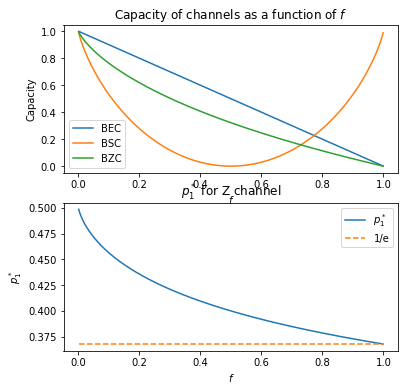

In [65]:
def h2(a):
    return entropy(np.stack([a,1-a]))

f = np.linspace(0.001, 1, num=1000, endpoint=False)
c_bec = 1 - f
c_bsc = 1 - h2(f)

p1_bzc = (1/(1-f))/(1+2**(h2(f)/(1-f)))
c_bzc = h2(p1_bzc*(1-f))-p1_bzc*h2(f)
fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(6,6))
ax1.plot(f, c_bec,label="BEC")
ax1.plot(f, c_bsc,label="BSC")
ax1.plot(f, c_bzc,label="BZC")
ax1.legend()
ax1.set(title='Capacity of channels as a function of $f$', xlabel='$f$', ylabel='Capacity');
ax2.plot(f,p1_bzc, label="$p_1^*$")
ax2.plot(f,[1/np.e]*f.size, linestyle='dashed',label='1/e')
ax2.set(title="$p_1^*$ for Z channel", xlabel="$f$", ylabel="$p_1^*$")
ax2.legend();

**Exercise 9.17** What is the capacity of the channel (shown in book)?  
Seems similar to the noisy typewriter.  
$H(Y\mid X)$ is independent of choice $\mathcal P_X$ and is 2 bits. So we just want to maximize $H(Y)$ which is when it is uniform, and then $H(Y)=\log10$. When $\mathcal P_X$ is uniform so is $\mathcal P_Y$ so over all we get $C=\max I(X;Y)=\log5$.

**Exercise 9.18** skipping for now, don't wanna mess with gaussians.

**Exercise 9.20** Birthday problem  
Probability is simple, written below
Regarding the expectation, lets write $X_i$ as the #pairs between the first $i$ people, and $Y_i$ as the number of people before him born on the $i$th person's birthday. Then $X_i=X_{i-1}+Y_i$ and (I think) they are iid? or not. It doesn't matter you dumb fuck!!!

$$E[Y_i]=E\left[\sum_{1\leq j<i}\mathbb{1}_{ij}\right]=\sum_{1\leq j<i}\frac1{A}=\frac{i-1}{A}$$

and

$$E[X_i]=E\left[\sum_{j=1}^iY_j\right]=\sum\frac{j-1}{A}=$$
Well I'm actually working too hard now that I dont need iid.
$$E[X_i]=\sum_{1\leq j<k\leq i}\mathbb{1}_{jk}= \binom{i}{2}\frac1{A}=\frac{i(i-1)}{2A}$$

Looking at the solution, I'm right. He pointed out that the expectation is more informative since it illustrates a clear relation between $A$ and $S$.

In [102]:
A = 356 # number of days in a year
S = 3 # number of people

#what is the probability that no one shares the same birthday?
p = 1
for i in range(S):
    p*= (A-i)/A

log_p = sum(np.log(A-np.arange(S)))-S*np.log(A)
print(f"p(atleast 2 people have same birthday)={1-p:.4f}")
print(f"E[X_s]={S*S/(2*A):.4f}")
print(f"log(p)={log_p}")
print(f"error={abs((p-np.exp(log_p)))}")


p(atleast 2 people have same birthday)=0.0084
E[X_s]=0.0126
log(p)=-0.008446759094873357
error=2.6645352591003757e-15


**Exercise 9.21** Relation of the birthday problem to a coding scheme.  
We want to identify one of the twenty-four people. We can communicate a number $\mathcal A_S=\{1,2,\dots,24\}$, or we could covey a birthday $\mathcal A_X=\{1,2\dots,365\}$. What's the probability of error for a single transmition? What is the capacity of the channel, and what is the rate of communication attempted?

Hmm, I think it's the kind of question to make you ponder the definition and how everything fits. We already encountered the symbol $\mathcal A_S$ before. Maybe we can model the input as $\mathcal A_S$ and the output as $\mathcal A_X$, since there is no outside noise.

So, what is the probability of error? we get an error if we have a clash with the birthday of the chosen person, someone else shares the same birthday. The probability of no error is
$$(S-1)\frac1A$$
ie no one shares the birthday. So the probability of error is $1-\frac{S-1}A$.

Maybe I'm thinking about it wrong... I think the birthdays are already deterministic.

Going back the block code defintion, the scenario is we have channel $Q$ and we have a list of length $S$ of codewords, in this case the birthdays (in the definition it's codes from $\mathcal A_X^N$ but let's ignore that for now). We use those codes to encode the signal which will be the people's number.

The rate is $R=K/N=(\log_2S)/N$ bits per channel use. In the case of $q$ input symbols, the rate is $K/(N\log_2 q)$, so one question is, if the otherside knows all the birthdays, does my input symbol need be of size $A$ or can I limit to $\leq S$?

A decoder would be a mapping from $\mathcal A_Y^N\to \mathcal A_S\cup \{0\}$, (0 signifying failure) but in our case the channel is noiseless so the domain is actually $\mathcal A_X^N$.

Here's what we'll do. Let's use the whole input of size 365, but in our case assume a uniform distribution $\mathcal P_S$, and figure out what it means for $\mathcal P_X$.

The rate is $(\log_2 24)/(1*\log_2 365)=$

In [103]:
np.log(24)/np.log(365)

0.5386625630729307

I found the solutions manual, so there is a solution if needed. Anyway, basically the questions for me now is how to formulate the noise, the meaning of knowing the birthdays in advance and what is the actual channel. I'll leave this and the next exercise be for now.

## The Noisy-Channel Coding Theorem

This is definitely one of the more difficult subjects encountred so far. Lots of definitions, tricky probability wording, some conceptual tricks in the proof. I read both the chapter, saw the lecture (which proves a specific case, the BSC) and read the proof in "Elements of Information Theory". 

_Wrote this at 12:30, then went into a chess frenzy and now it's 18:52. noice..._

Let's state the theorem:
1. For every discrete memoryless cahnnel, the channel capcacity
$$C=\max_{\mathcal P_X}I(X;Y)$$ has the property that for any $\varepsilon>0$ and $R<C$, for large enough $N$, there exists a code of length $N$ and rate $\geq R$ and a decoding algorithm, s.t  $P_\text{BM}<\varepsilon$.
2. If a probability of bit error $p_b$ is acceptable, rates up to $R(p_b)$ are achievable, where
$$R(p_b)=\frac{C}{1-H_2(p_b)}$$
3. For any $p_b$, rates greater than $R(p_b)$ are not achievable.

I'm not sure how much of the proof will be written here, and I also want to try to demonstrate some of the ideas interactively. Ofcourse, it is somewhat challenging since a lot of the properties only take hold when $n$ is really big.

So the first notion we examine is Joint Typicality, as we will base our coding and decoding on it.

**Joint typicality** - A pair of sequences $\vec x, \vec y$ of length $N$ are defined to be jointly typical (to tolerance $\beta$) with respect to distribution $P(x,y)$ if $\vec x \in T_{N\beta}^X$, $\vec y\in T_{N\beta}^Y$ and $(\vec x, \vec y)\in T_{N\beta}^XY$. The set of all jointly-typical sequences is $J_{N\beta}$.

**Joint typicality theorem** Let $\vec x, \vec y\sim (XY)^N$
$$P(\vec x, \vec y)=\prod_{n=1}^NP(x_n,y_n)$$
Then
1. $P(\vec x, \vec y\in J_{N\beta})\underset{N\to\infty}\to1$
2. $\left|J_{N\beta}\right|\leq2^{N(H(X,Y)+\beta)}$
3. if $\vec {x'}$ and $\vec {y'}$ are sampled independently from the marginal distributions then $P(\vec {x'}, \vec {y'}\in J_{N\beta})\leq2^{-N(IX;Y)-3\beta)}$

Let's explore the theorem in the case of a BSC

In [146]:
# get vector of probabilities and return its emprical entropy
def emp_entropy(p):
    return sum(-np.log2(p))/len(p)

f=0.2
q=np.array([[1-f,f]
           ,[f,1-f]])
p_x=np.array([.9,.1])
p_y=q@p_x
p_xy=q*p_x
H_X = entropy(p_x)
H_Y = entropy(p_y)
H_XY = entropy(p_xy.flatten())

print(f"H(X)={H_X:.4f}, H(Y)={H_Y:.4f}, H(XY)={H_XY:.4f}, I(X;Y)={entropy(p_y) - entropy(q)@p_x:.4f}")
N = 1000
beta = 0.1
jt_counter = 0 # x and y are jointly typical
ijt_counter = 0 # x` and y are iid and jointly typical
attempts = 1000
for i in range(attempts):
    s_x=bernoulli.rvs(p_x[1], size=N)
    s_y_x = bernoulli.rvs(q[1, s_x], size=N)
    s_x_alt=bernoulli.rvs(p_x[1], size=N)
    x_t = abs(H_X-emp_entropy(p_x[s_x])) < beta
    y_t = abs(H_Y-emp_entropy(p_y[s_y_x])) < beta
    xy_jt = abs(H_XY-emp_entropy(p_xy[s_y_x,s_x])) < beta
    x_alt_t = abs(H_X-emp_entropy(p_x[s_x_alt])) < beta
    x_alty_jt = abs(H_XY-emp_entropy(p_xy[s_y_x,s_x_alt])) < beta
    if x_t and y_t and xy_jt: jt_counter+= 1
    if x_alt_t and y_t and x_alty_jt: ijt_counter += 1
        
print(f"freq(x,y are JT)={jt_counter/attempts}, freq(x`,y are JT)={ijt_counter/attempts}")

H(X)=0.4690, H(Y)=0.8267, H(XY)=1.1909, I(X;Y)=0.1048
freq(x,y are JT)=0.988, freq(x`,y are JT)=0.008


0.006965784284662087

We can see that in this case the set pretty quickly converges to 1. If $\beta$ is larger than $I(X;Y)/3$ then the 3rd part of the theorem is meaningless. 

### Typical-set decoders
We'll describe an encoding and decoding scheme, given a rate $R'$ and $N$ block size, and $P(x)$ distribution on $\mathcal A_X$. We sample $S=2^{NR'}$ codewords from $\mathcal A_X^N$ according to $P(\vec x)=\prod_{n=1}^NP(x_n)$. Given a transmission $\vec y_s$, we will look for a codeword $\vec x\in\mathcal C$ that is jointly typical with it. If more than one is found or none at all, we declare failure, otherwise we decode it as its jointly typical pair.

This is not the optimal decoding scheme (that would be MAP) but it is good enough and easier to analyze. In what circumstances does our scheme fail? Either the received transmition is not jointly typical with the message sent, or there is another code who is also jointly-typical with the transmition. 

The proof in the book is pretty vague. I can either describe the ideas textually or try writing down the equations.

**Proof:**
Let there be $\varepsilon>0$ and $R<C$ capacity of the channel. We generate $2^{NR}$ codes as described above and set them in a matrix
$$\mathcal{C}=\begin{bmatrix}
x_1(1) & x_2(1) & \dots & x_n(1) \\
\vdots & \vdots & \ddots & \vdots \\
x_1(2^{NR}) & x_2(2^{NR}) & \dots & x_n(2^{NR}) \\
\end{bmatrix}$$

Since each entry is i.i.d
$$P(\mathcal C)=\prod_{w=1}^{2^{NR}}\prod_{i=1}^Np(x_i(w))$$

Instead of calculating the particular generated code's probability of error, we average over all codes.

$$\begin{align}
P(\mathcal E)&=\sum_{\mathcal C}P(\mathcal C)P_\text{B}(\mathcal C)\\
&=\sum_{\mathcal C}P(\mathcal C)\frac1{2^{NR}}\sum_{w=1}^{2^{NR}}\lambda_w(\mathcal C)\\
&=\frac1{2^{NR}}\sum_{w=1}^{2^{NR}}\sum_{\mathcal C}P(\mathcal C)\lambda_w(\mathcal C)\\
&=\sum_\mathcal{C}P(\mathcal C)\lambda_1(\mathcal C)\\
&=P(\text{$\vec x_1$ and $\vec y$ not jointly-typical})+P(\text{another code word is jointly-typical})\\
& \leq \varepsilon+(2^{NR}-1)2^{-N(I(X;Y)-3\varepsilon}\\
& \leq \varepsilon +2^{3N\varepsilon}2^{-N(I(X;Y)-R)}\\
& \leq 2\varepsilon
\end{align}$$

Since the average is smaller than $2\varepsilon$ there is a code with $p_\text{B}<2\varepsilon$. What about the maximal error? if we throw out half of the worst code words, we reduce that rate by $\frac1N$ and bound the maximal error as $4\epsilon$, as wanted.

So above is the deriviation without justification for the equalities and inequalities. If you can follow this, you understand the proof. If not, refer to Elements of Information Theory for the actual proof, which fairly clean and nicely presented.

Phew, I don't know why but this proof business is really tiring. I'm going to skip the rest of the chapter and the following one, and move on to the next-next part, probabilities and inference.

**Rest of chapter** - TBD

## Error-Correcting Codes and Real Channels
TBD